<a href="https://colab.research.google.com/github/gerardcalabrese/HCSPD2024/blob/main/Ejercicio_3_Calculo_Simbolico_Octave_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equilibrio inestable del péndulo

Sea el diagrama del péndulo, extraído de [Sontag 1998](http://www.sontaglab.org/FTPDIR/sontag_mathematical_control_theory_springer98.pdf), http://www.sontaglab.org/publications.html.

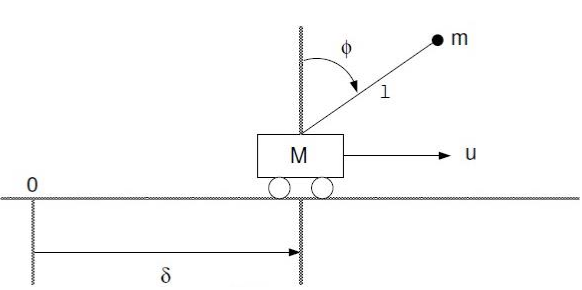

Para el caso de la linealización de sistemas dinámicos, el modelo mecánico del péndulo para cualquier ángulo $\phi$ se puede escribir como


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} \cdot
 cos (\phi) + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} \cdot
 cos (\phi) + m\cdot long \cdot \dot{\phi}^2 \cdot sen (\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot sen(\phi) - \ddot{\delta} \cdot cos(\phi)
\end{cases}
\end{equation*}$


 Se va a linealizar aplicando Taylor a las ecuacione en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$, **u**=0.

Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.
Se desea obtener mediante **cálculo simbólico** la versión lineal del péndulo en el equilibrio inestable.
Se emplea Taylor previo reemplazo de cos(𝛷) ≈1 y sen(𝛷)≈𝛷.
Luego se presenta el sistema matricial.


Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\delta}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long}
\end{cases}
\end{equation*}$
<!--
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\dot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación subs().

In [ ]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,850 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,389 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/res

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

Ahora se instala el paquete simbólico en Octave. Para ello, primero se instala en el entorno Colab la librería, y luego desde Octave se ejecuta el código `pkg install -forge symbolic`  para que Octave lo pueda emplear.

In [3]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
The following additional packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil
Suggested packages:
  python-mpmath-doc python3-gmpy2 python3-matplotlib python-numpy-doc python3-pytest python-pil-doc
  texlive-fonts-extra dvipng python-sympy-doc
The following NEW packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil python3-sympy
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,725 kB of archives.
After this operation, 54.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libraqm0 amd64 0.7.0-4ubuntu1 [11.7 kB]
Get:3

In [4]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [7]:
!pip install --user sympy==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.

In [8]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


# Parte 1

Obtener la versión linealizada en los equilibrios del sistema empleando el paquete de cálculo simbólico, tomando como referencia las instrucciones del Script de la Tabla 3 1. Se sugiere realizar la aproximación de las funciones coseno y seno por su variable correspondiente en el punto de operación, y luego mediante el programa obtener las expresiones de la aceleración del carro y aceleración angular del péndulo.

In [5]:
%%writefile Caso_lineal.m
clear all; clc; % Borro todas las variables que puedan existir en el entorno
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
% Defino variables simbolicas

syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;

disp('Para el equilibrio inestable')
# Condicion de angulo inicial
ang_inic=0;

##Sistemas de ecuaciones a despejar:
## Se consideran pequeños angulos para un angulo inicial de 0, sin(fi)~fi, cos(fi)~1
p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p^2*fi-Fricc*p_p); %Pequeños angulos
%Le asigno otro nombre a fi_pp para no pisar la ecuacion
Fi_pp=solve(fi_pp==(1/long)*(g*fi-p_pp),fi_pp);

%Remplazo el valor de la ecuacion fi_pp hallada en la ecuación de p_pp
p_pp=simplify(subs(p_pp,'fi_pp',Fi_pp));
##Muestro los resultados
display(p_pp)
display(Fi_pp)

Writing Caso_lineal.m


In [9]:
!octave -W Caso_lineal.m # -W : no window system

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.5.1.
Para el equilibrio inestable
p_pp = (sym)

                    2                    
  -Fricc⋅pₚ + fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + u
  ───────────────────────────────────────
                     M                   

Fi_pp = (sym)

                            2                    
  Fricc⋅pₚ + M⋅fi⋅g - fi⋅fiₚ ⋅long⋅m + fi⋅g⋅m - u
  ───────────────────────────────────────────────
                       M⋅long                    




# Punto 2
Obtener simulaciones del sistema linealizado (5) en las condiciones iniciales  x_o=[0 0-0.01 0]^T  y x_o=[0 0 3.2 0]^T, empleando una integración Euler con Δt=10^(-4) s. El tiempo de simulación será de 10 segundos en cada caso, con u=0

In [16]:
%%writefile Punto2.m
clear all
close all
m = 0.1
Fr =0.1
l = 0.6
g = 9.8
M = 0.5
u = 0
Dt = .5*1e-3
tiempo_fin = 10
##Matrices del caso 1
Xo1 = [0 0 -0.01 0 ]
A1=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*Xo1(4)*Xo1(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*Xo1(3))/(M*l) -(m*l*Xo1(4)*Xo1(3))/(M*l)]];
B1=[0; u/M; 0; -u/(M*l)]

##Matrices del caso 2
Xo2 = [0 0 3.2 0 ]
A2=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*Xo2(4)*Xo2(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*Xo2(3))/(M*l) -(m*l*Xo2(4)*Xo2(3))/(M*l)]];
B2=[0; u/M; 0; -u/(M*l)]

cantidad_pasos = tiempo_fin/Dt+1 # determino la cantidad de pasos necesarios para obtener el tiempo tau

X1 = transpose(Xo1)
X2 = transpose(Xo2)

t(1) = 0;
# Integración Euler Forward para el paso elegido
for n = 1: cantidad_pasos -1
  t(n+1) = t(n)+Dt;
  A1=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*X1(4)*X1(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*X1(3))/(M*l) -(m*l*X1(4)*X1(3))/(M*l)]];
  Xp1(:,n) = A1*X1(:,n)+B1;
  X1(:,n+1) = X1(:,n)+Xp1(:,n)*Dt;
  A2=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*X2(4)*X2(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*X2(3))/(M*l) -(m*l*X2(4)*X2(3))/(M*l)]];
  Xp2(:,n) = A2*X2(:,n)+B2;
  X2(:,n+1) = X2(:,n)+Xp2(:,n)*Dt;
endfor



figure

subplot(211)
plot(t,X1(2,:))
title('angulo fi')
xlabel('tiempo [s]')
ylabel('ángulo [Rad]')
legend('Caso 1')

subplot(212)
plot(t,X2(2,:))
xlabel('tiempo [s]')
ylabel('ángulo [Rad]')
legend('Caso 2')

print -dpng Punto2.png;

Overwriting Punto2.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [17]:
!octave -W Punto2.m # -W : no window system

m = 0.1000
Fr = 0.1000
l = 0.6000
g = 9.8000
M = 0.5000
u = 0
Dt = 5.0000e-04
tiempo_fin = 10
Xo1 =

          0          0  -0.010000          0

B1 =

   0
   0
   0
   0

Xo2 =

        0        0   3.2000        0

B2 =

   0
   0
   0
   0

cantidad_pasos = 20001
X1 =

          0
          0
  -0.010000
          0

X2 =

        0
        0
   3.2000
        0


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.
ans = -7.7682
ans = -21.401
                                          

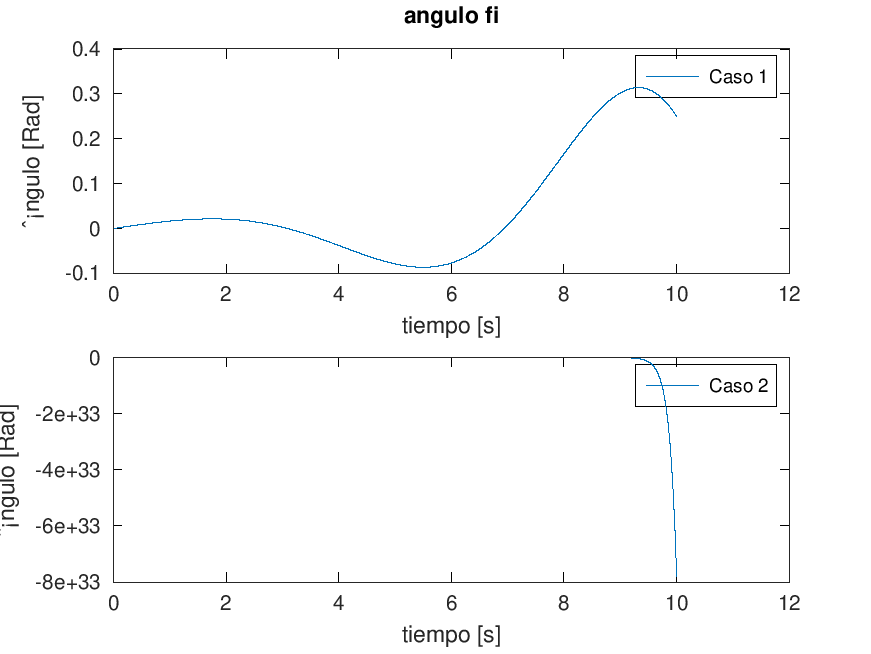

In [18]:
from IPython import display
display.Image('Punto2.png')

Como se detalla en el entregable, la forma de aproximar el caso 2 con la linealización del caso 1 da un error.
Se procede a incorporar al script una nueva aproximación por Taylor en el punto phi = pi

In [26]:
%%writefile Punto2_modificado.m
clear all
close all
m = 0.1
Fr =0.1
l = 0.6
g = 9.8
M = 0.5
u = 0
Dt = .5*1e-3
tiempo_fin = 10
##Matrices del caso 1
Xo1 = [0 0 -0.01 0 ]
A1=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*Xo1(4)*Xo1(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*Xo1(3))/(M*l) -(m*l*Xo1(4)*Xo1(3))/(M*l)]]
B1=[0; u/M; 0; -u/(M*l)]

##Matrices del caso 2
Xo2 = [0 0 3.2 0 ]
A2=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*Xo2(4)*Xo2(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*Xo2(3))/(M*l) -(m*l*Xo2(4)*Xo2(3))/(M*l)]]
B2=[0; u/M; 0; -u/(M*l)]

cantidad_pasos = tiempo_fin/Dt+1 # determino la cantidad de pasos necesarios para obtener el tiempo tau

X1 = transpose(Xo1)
X2 = transpose(Xo2)

t(1) = 0;
# Integración Euler Forward para el paso elegido
for n = 1: cantidad_pasos -1
  t(n+1) = t(n)+Dt;
  A1=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*X1(4)*X1(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*X1(3))/(M*l) -(m*l*X1(4)*X1(3))/(M*l)]];
  Xp1(:,n) = A1*X1(:,n)+B1;
  X1(:,n+1) = X1(:,n)+Xp1(:,n)*Dt;
  A2=[[0 0 1 0];...
   [0 -(Fr/M) (-1+pi)*(g*m)/M (-X2(3)+pi)*(m*l*X2(4))/M];...
   [0 0 0 1 ];...
   [0 -Fr/(M*l) (-(M+m)*g)/(M*l) (-X2(3)+pi)*(m*l*X2(4))/(M*l)]];
  Xp2(:,n) = A2*X2(:,n)+B2;
  X2(:,n+1) = X2(:,n)+Xp2(:,n)*Dt;
endfor
save('Punto2.mat','-v7');
figure

subplot(211)
plot(t,X1(2,:))
title('angulo fi')
xlabel('tiempo [s]')
ylabel('ángulo [Rad]')
legend('Caso 1')
subplot(212)
plot(t,X2(2,:))
##title('angulo fi caso 2')
xlabel('tiempo [s]')
ylabel('ángulo [Rad]')
legend('Caso 2')
print -dpng Punto2_modificado.png;

Overwriting Punto2_modificado.m


In [27]:
!octave -W Punto2_modificado.m # -W : no window system

m = 0.1000
Fr = 0.1000
l = 0.6000
g = 9.8000
M = 0.5000
u = 0
Dt = 5.0000e-04
tiempo_fin = 10
Xo1 =

          0          0  -0.010000          0

A1 =

        0        0   1.0000        0
        0  -0.2000  -1.9600        0
        0        0        0   1.0000
        0   0.3333  -0.1960        0

B1 =

   0
   0
   0
   0

Xo2 =

        0        0   3.2000        0

A2 =

         0         0    1.0000         0
         0   -0.2000   -1.9600         0
         0         0         0    1.0000
         0    0.3333   62.7200         0

B2 =

   0
   0
   0
   0

cantidad_pasos = 20001
X1 =

          0
          0
  -0.010000
          0

X2 =

        0
        0
   3.2000
        0


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not 

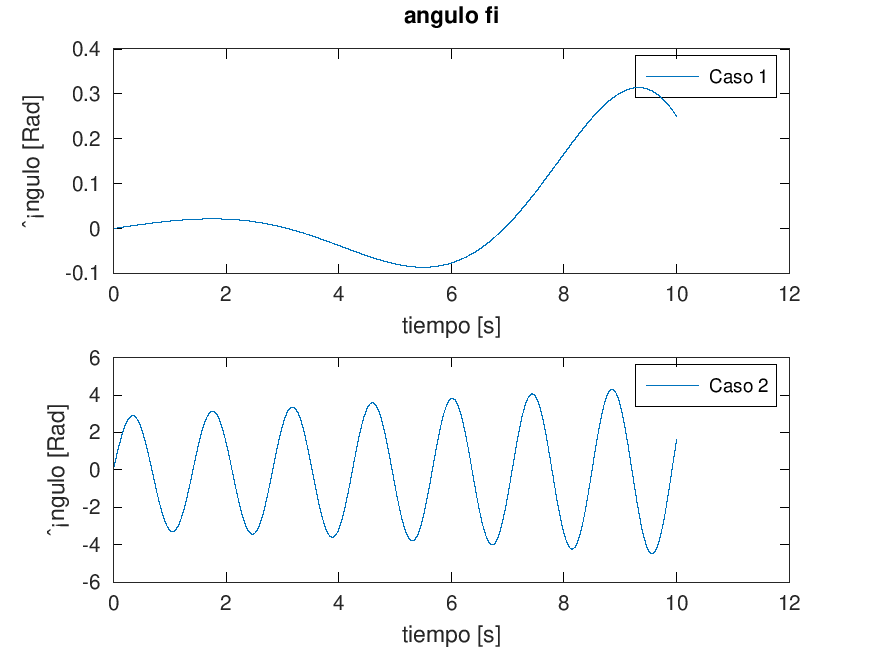

In [22]:
display.Image('Punto2_modificado.png')

# Punto 3
Modificar la masa m al doble y repetir la operación

Realizo un nuevo script por no haber definido una función con variables de entrada para los puntos anteriores.

In [28]:
%%writefile Punto3.m
clear all
close all
m = 0.1*2
Fr =0.1
l = 0.6
g = 9.8
M = 0.5
u = 0
Dt = .5*1e-3
tiempo_fin = 10
##Matrices del caso 1
Xo1 = [0 0 -0.01 0 ]
A1=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*Xo1(4)*Xo1(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*Xo1(3))/(M*l) -(m*l*Xo1(4)*Xo1(3))/(M*l)]]
B1=[0; u/M; 0; -u/(M*l)]

##Matrices del caso 2
Xo2 = [0 0 3.2 0 ]
A2=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*Xo2(4)*Xo2(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*Xo2(3))/(M*l) -(m*l*Xo2(4)*Xo2(3))/(M*l)]]
B2=[0; u/M; 0; -u/(M*l)]

cantidad_pasos = tiempo_fin/Dt+1 # determino la cantidad de pasos necesarios para obtener el tiempo tau

X1 = transpose(Xo1)
X2 = transpose(Xo2)

t(1) = 0;
# Integración Euler Forward para el paso elegido
for n = 1: cantidad_pasos -1
  t(n+1) = t(n)+Dt;
  A1=[[0 0 1 0];...
   [0 -Fr/M -(g*m)/M (m*l*X1(4)*X1(3))/M];...
   [0 0 0 1 ];...
   [0 Fr/(M*l) ((M+m)*g*X1(3))/(M*l) -(m*l*X1(4)*X1(3))/(M*l)]];
  Xp1(:,n) = A1*X1(:,n)+B1;
  X1(:,n+1) = X1(:,n)+Xp1(:,n)*Dt;
  A2=[[0 0 1 0];...
   [0 -(Fr/M) (-1+pi)*(g*m)/M (-X2(3)+pi)*(m*l*X2(4))/M];...
   [0 0 0 1 ];...
   [0 -Fr/(M*l) (-(M+m)*g)/(M*l) (-X2(3)+pi)*(m*l*X2(4))/(M*l)]];
  Xp2(:,n) = A2*X2(:,n)+B2;
  X2(:,n+1) = X2(:,n)+Xp2(:,n)*Dt;
endfor
save('Punto3.mat','-v7');
figure

subplot(211)
plot(t,X1(2,:))
title('angulo fi')
xlabel('tiempo [s]')
ylabel('ángulo [Rad]')
legend('Caso 1')
subplot(212)
plot(t,X2(2,:))
##title('angulo fi caso 2')
xlabel('tiempo [s]')
ylabel('ángulo [Rad]')
legend('Caso 2')
print -dpng Punto3.png;

Overwriting Punto3.m


In [29]:
!octave -W Punto3.m # -W : no window system

m = 0.2000
Fr = 0.1000
l = 0.6000
g = 9.8000
M = 0.5000
u = 0
Dt = 5.0000e-04
tiempo_fin = 10
Xo1 =

          0          0  -0.010000          0

A1 =

        0        0   1.0000        0
        0  -0.2000  -3.9200        0
        0        0        0   1.0000
        0   0.3333  -0.2287        0

B1 =

   0
   0
   0
   0

Xo2 =

        0        0   3.2000        0

A2 =

         0         0    1.0000         0
         0   -0.2000   -3.9200         0
         0         0         0    1.0000
         0    0.3333   73.1733         0

B2 =

   0
   0
   0
   0

cantidad_pasos = 20001
X1 =

          0
          0
  -0.010000
          0

X2 =

        0
        0
   3.2000
        0


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not 

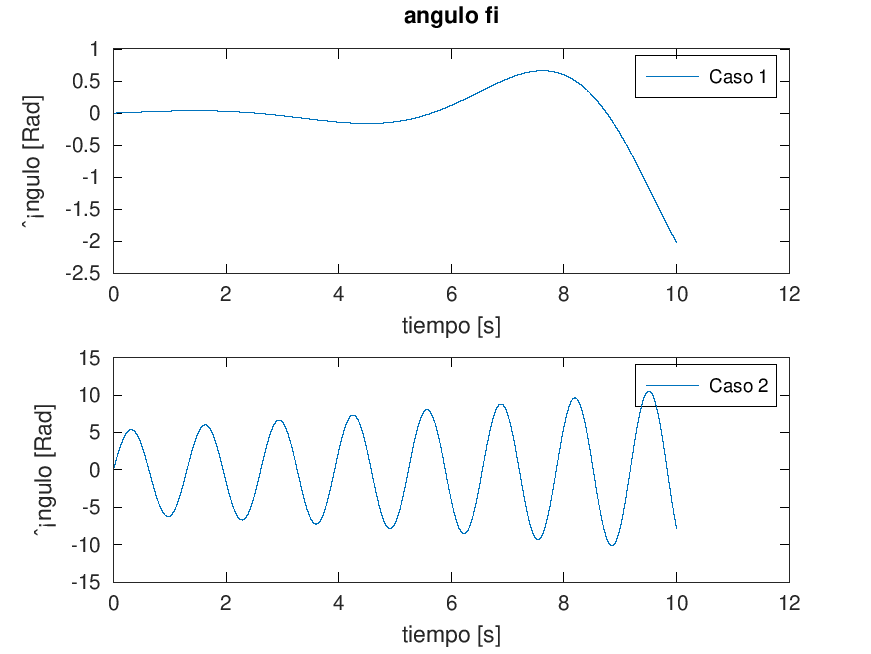

In [25]:
display.Image('Punto3.png')

Realizo una comparación con el punto 2

In [30]:
import numpy as np
import scipy.io
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [59]:
#Importa los datos que se generaron desde Octave en el archivo .mat
mat2 = scipy.io.loadmat('/content/Punto2.mat')
aux=mat2.get('t')
t1 = aux[0,:]
X1=mat2.get('X1')
x1_car = X1[0,:]
x1_car_vel = X1[1,:]
x1_ang = X1[2,:]
x1_ang_vel = X1[3,:]

X2=mat2.get('X2')
x2_car = X2[0,:]
x2_car_vel = X2[1,:]
x2_ang = X2[2,:]
x2_ang_vel = X2[3,:]

mat3 = scipy.io.loadmat('/content/Punto3.mat')
aux=mat3.get('t')
t3 = aux[0,:]
X1_3=mat3.get('X1')
x1_3_car = X1_3[0,:]
x1_3_car_vel = X1_3[1,:]
x1_3_ang = X1_3[2,:]
x1_3_ang_vel = X1_3[3,:]

X2_3=mat3.get('X2')
x2_3_car = X2_3[0,:]
x2_3_car_vel = X2_3[1,:]
x2_3_ang = X2_3[2,:]
x2_3_ang_vel = X2_3[3,:]


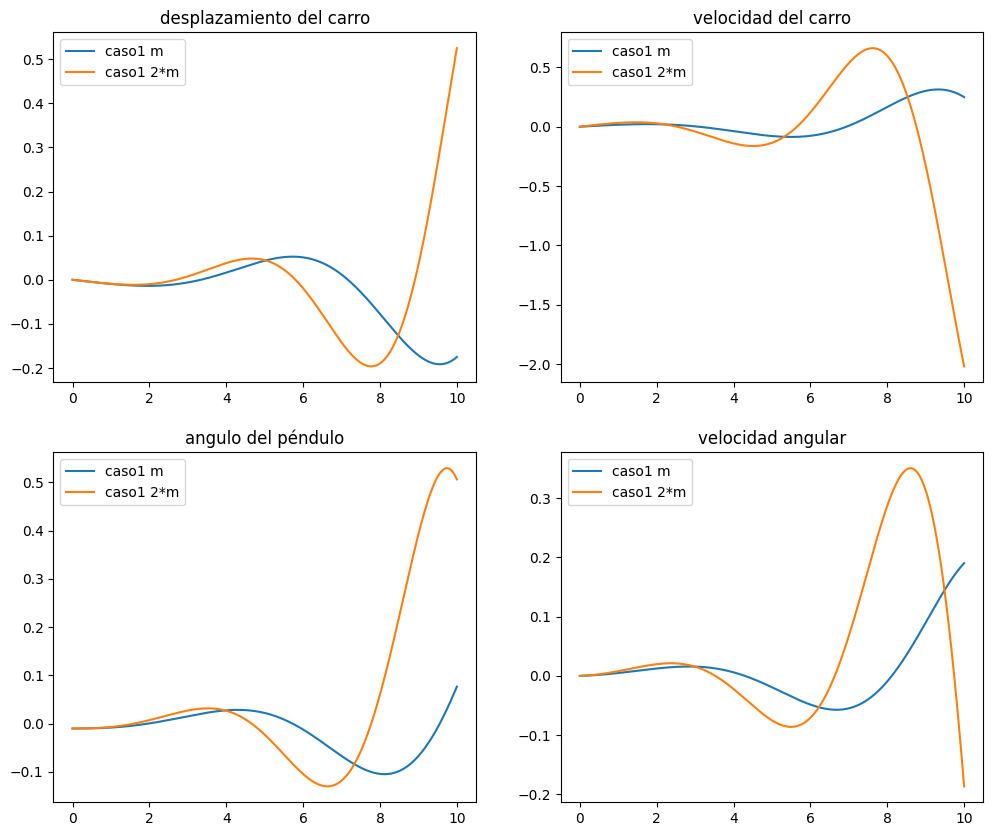

In [61]:
plt.figure(figsize=(12,10), dpi=100)
plt.subplot(2,2,1)
plt.plot(t1,x1_car,label='caso1 m')
plt.plot(t3,x1_3_car,label='caso1 2*m')
plt.title('desplazamiento del carro')
plt.legend()

plt.subplot(2,2,2)
plt.plot(t1,x1_car_vel,label='caso1 m')
plt.plot(t3,x1_3_car_vel,label='caso1 2*m')
plt.title('velocidad del carro')
plt.legend()

plt.subplot(2,2,3)
plt.plot(t1,x1_ang,label='caso1 m')
plt.plot(t3,x1_3_ang,label='caso1 2*m')
plt.title('angulo del péndulo')
plt.legend()

plt.subplot(2,2,4)
plt.plot(t1,x1_ang_vel,label='caso1 m')
plt.plot(t3,x1_3_ang_vel,label='caso1 2*m')
plt.title('velocidad angular')
plt.legend()

plt.show()